In [3]:
# Required libraries
# pip install numpy pandas scikit-learn matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import itertools
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import _stop_words
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [4]:
# LOad the dataset
our_data = pd.read_csv("dataset/Full-Economic-News-DFE-839861.csv",encoding="ISO-8859-1")
# Display initial shape and class distribution
print(f"Dataset Shape: {our_data.shape}")
print(our_data["relevance"].value_counts() / our_data.shape[0])

Dataset Shape: (8000, 15)
relevance
no          0.821375
yes         0.177500
not sure    0.001125
Name: count, dtype: float64


In [5]:
# Filter and map labels
our_data = our_data[our_data.relevance != "not sure"]
our_data['relevance'] = our_data.relevance.map({'yes': 1, 'no': 0})
# Keep only the necessary columns
our_data = our_data[["text", "relevance"]]
print(f"Cleaned Shape: {our_data.shape}")

Cleaned Shape: (7991, 2)


In [6]:
stopwords = _stop_words.ENGLISH_STOP_WORDS
def clean(doc):
 # Remove HTML line breaks
 doc = doc.replace("</br>", " ")
 # Remove punctuation and numbers
 doc = "".join([char for char in doc if char not in
string.punctuation and not char.isdigit()])
 # Remove stopwords and tokenize
 doc = " ".join([token for token in doc.split() if token not in
stopwords])
 return doc


In [7]:
X = our_data.text
y = our_data.relevance
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

In [8]:
# Instantiate and fit Vectorizer
vect = CountVectorizer(preprocessor=clean)
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
# Train Multinomial Naive Bayes
nb = MultinomialNB()
%time nb.fit(X_train_dtm, y_train)
# Make predictions
y_pred_class = nb.predict(X_test_dtm)

CPU times: total: 0 ns
Wall time: 12.2 ms


In [9]:
print("Accuracy: ", accuracy_score(y_test, y_pred_class))
print("ROC_AUC_Score: ", roc_auc_score(y_test, y_pred_class))

Accuracy:  0.7822822822822822
ROC_AUC_Score:  0.6378082888380371


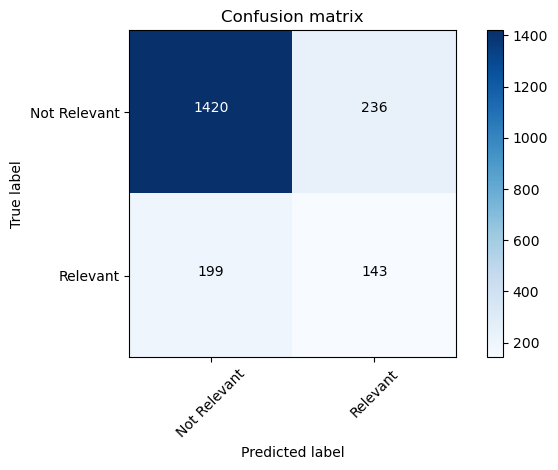

In [11]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix',cmap=plt.cm.Blues):
 plt.imshow(cm, interpolation='nearest', cmap=cmap)
 plt.title(title)
 plt.colorbar()
 tick_marks = np.arange(len(classes))
 plt.xticks(tick_marks, classes, rotation=45)
 plt.yticks(tick_marks, classes)
 fmt = 'd'
 thresh = cm.max() / 2.
 for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
     plt.text(j, i, format(cm[i, j], fmt),
     horizontalalignment="center",
     color="white" if cm[i, j] > thresh else "black")
     plt.ylabel('True label')
     plt.xlabel('Predicted label')
     plt.tight_layout()
# Plotting
conf_mat = confusion_matrix(y_test, y_pred_class)
plot_confusion_matrix(conf_mat, classes=['Not Relevant', 'Relevant'])
plt.show()


In [12]:
# Step 4: Train Logistic Regression
logreg = LogisticRegression()
%time logreg.fit(X_train_dtm, y_train)
# Predict
y_pred_logreg = logreg.predict(X_test_dtm)
# Evaluate
print("LogReg Accuracy: ", accuracy_score(y_test, y_pred_logreg))
print("LogReg ROC_AUC: ", roc_auc_score(y_test, y_pred_logreg))

CPU times: total: 2.14 s
Wall time: 303 ms
LogReg Accuracy:  0.7902902902902903
LogReg ROC_AUC:  0.5753559623696923


In [13]:
# Step 5: Train Linear SVM
vect = CountVectorizer(preprocessor=clean, max_features=1000)
# Optional: restrict features for speed
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
svm = LinearSVC()
%time svm.fit(X_train_dtm, y_train)
# Predict
y_pred_svm = svm.predict(X_test_dtm)
# Evaluate
print("SVM Accuracy: ", accuracy_score(y_test, y_pred_svm))
print("SVM ROC_AUC: ", roc_auc_score(y_test, y_pred_svm))


CPU times: total: 62.5 ms
Wall time: 60.4 ms
SVM Accuracy:  0.7837837837837838
SVM ROC_AUC:  0.5783911772184083
